In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("GlobalLandTemperaturesByCity.csv")
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


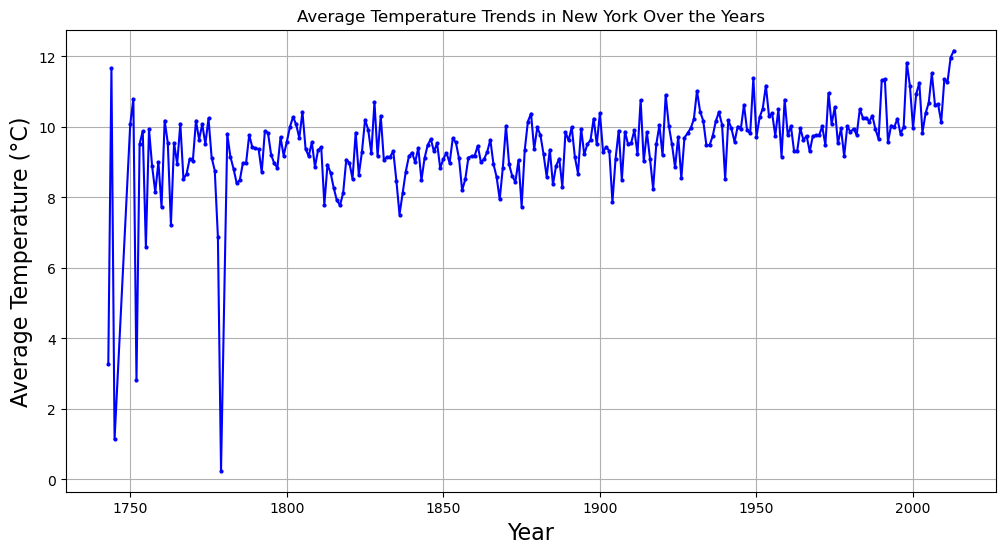

In [16]:
city_data=data[data['City']=="New York"].copy()
city_data['dt'] = pd.to_datetime(data['dt'], errors='coerce')
city_data['Year'] = city_data['dt'].dt.year
annual_avg_temp = city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
# Plot the average temperature over the years
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'], annual_avg_temp['AverageTemperature'],linestyle='-',marker="o",markersize=2, color='blue')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Temperature (°C)',fontsize=16)
plt.title(f'Average Temperature Trends in {city_name} Over the Years')
plt.grid(True)
plt.show()


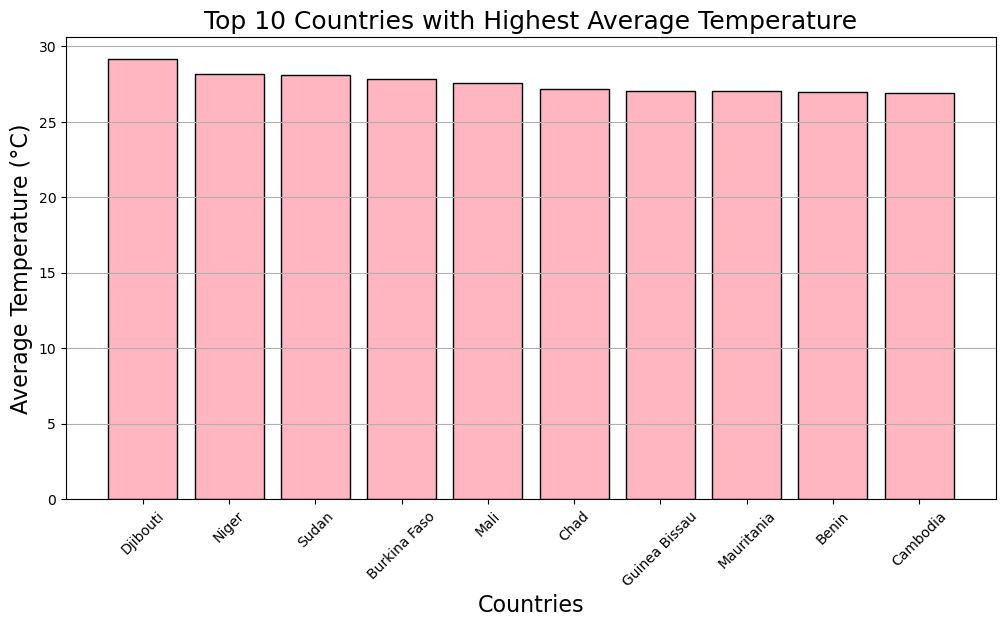

In [43]:
# Drop rows with missing temperature values
# or data = data.dropna(subset=['AverageTemperature'])

# Group by country and calculate the average temperature for each country
country_avg_temp = data.groupby('Country')['AverageTemperature'].mean().reset_index()

country_avg_temp=country_avg_temp.dropna()
# Sort the countries by average temperature in descending order and get the top 10
top_countries = country_avg_temp.sort_values(by='AverageTemperature',ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
#plt.bar(top_countries.index, top_countries.values, color='blue')
plt.bar(top_countries['Country'], top_countries['AverageTemperature'], color='lightpink',edgecolor='black')
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Average Temperature (°C)', fontsize=16)
plt.title('Top 10 Countries with Highest Average Temperature', fontsize=18)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


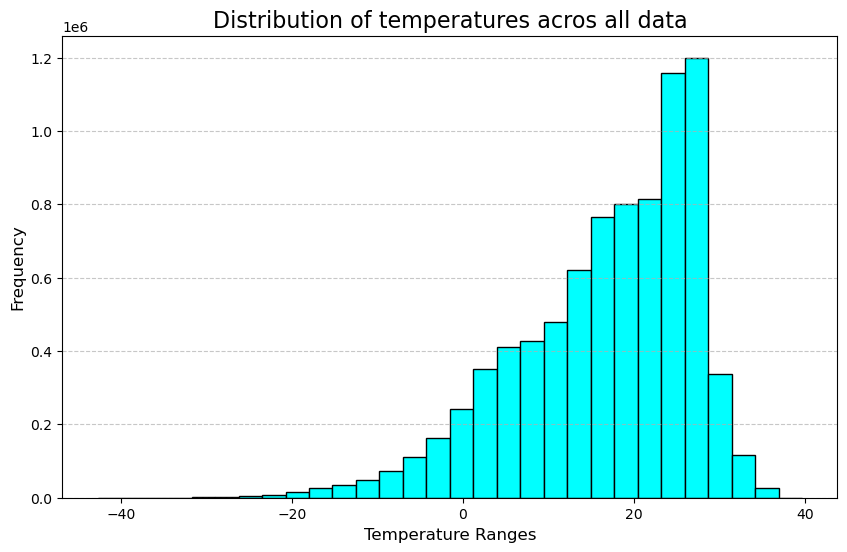

In [44]:
temperature_data = data['AverageTemperature'].dropna()

# Plot the average temperature over the years
plt.figure(figsize=(10,6))
plt.hist(temperature_data, bins=30, color='cyan',edgecolor='black')
plt.xlabel('Temperature Ranges', fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Distribution of temperatures acros all data',fontsize=16)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

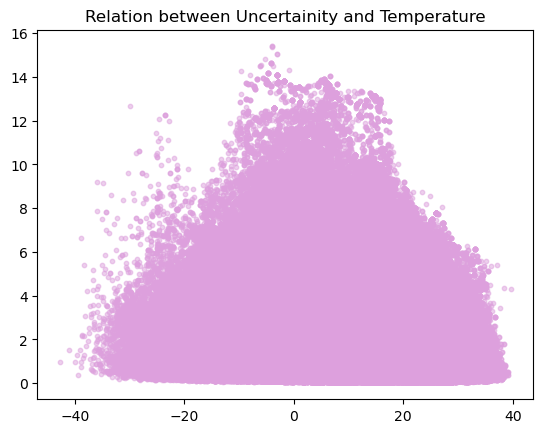

In [56]:
temperature_data = data['AverageTemperature'].dropna()
temperature_uncertainity=data['AverageTemperatureUncertainty'].dropna()
#temperature_data = data[['AverageTemperature','AverageTemperatureUncertainty']].dropna()

plt.scatter(temperature_data,temperature_uncertainity,color="Plum",s=10,alpha=0.5)
plt.title("Relation between Uncertainity and Temperature")
plt.show()

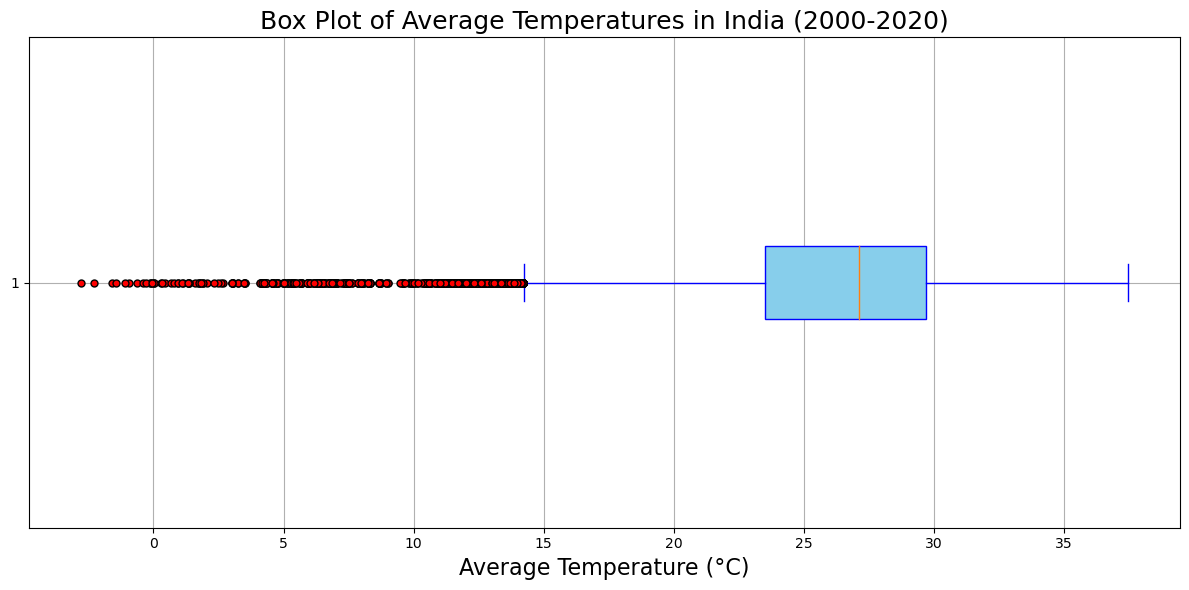

In [65]:
country_data = data[data['Country'] == "India"].copy()

# Convert the 'dt' column to datetime format
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')

# Filter data for a specific time range (e.g., between 2000 and 2020)
country_data = country_data[(country_data['dt'].dt.year >= 2000) & (country_data['dt'].dt.year <= 2020)]

# Drop rows with missing temperatures
country_data = country_data.dropna(subset=['AverageTemperature'])

# Create a box plot for the filtered country and time range
plt.figure(figsize=(12, 6))
plt.boxplot(country_data['AverageTemperature'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=5))

# Set labels and title
plt.xlabel('Average Temperature (°C)', fontsize=16)
plt.title('Box Plot of Average Temperatures in India (2000-2020)', fontsize=18)

# Show grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
country_data = data[data['Country'] == "India"].copy()

# Convert the 'dt' column to datetime format
country_data['dt'] = pd.to_datetime(country_data['dt'], errors='coerce')

# Drop rows with missing temperatures
country_data = country_data.dropna(subset=['dt'])

country_data['Year']= country_data['dt'].dt.year
country_data = country_data[['Year','AverageTemperature']].dropna()
group_data=[group['AverageTemperature'] for _, group in country_data.groupby('Year')]


# Create a box plot for the filtered country and time range
plt.figure(figsize=(12, 6))
plt.boxplot(grouped_data, showfiles

# Set labels and title
plt.xlabel('Average Temperature (°C)', fontsize=16)
plt.title('Box Plot of Average Temperatures in Germany (2000-2020)', fontsize=18)

# Show grid
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
pip install seaborn

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
#load tips data set
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


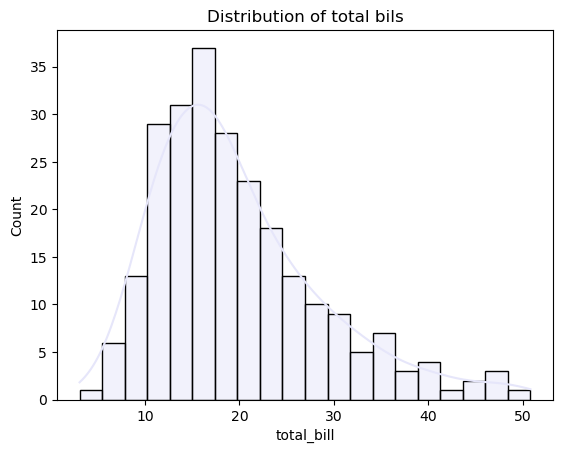

In [73]:
#Historam for total bill ammounts
sns.histplot(data=tips, x='total_bill',bins=20,color="lavender",kde=True) #kernal density estimation
plt.title("Distribution of total bils")
plt.show()

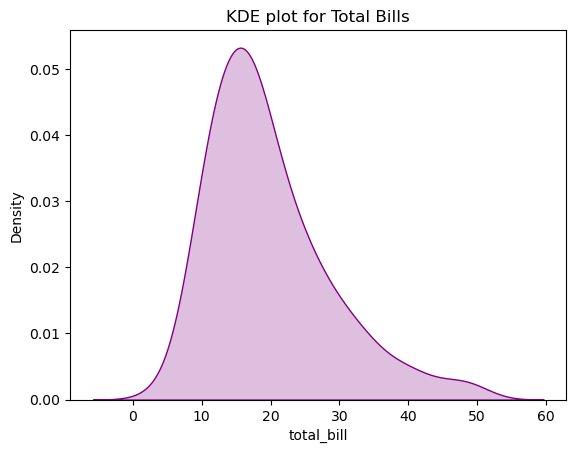

In [77]:
sns.kdeplot(data=tips,x="total_bill",fill=True,color='purple') #or shade=True
plt.title("KDE plot for Total Bills")
plt.show()

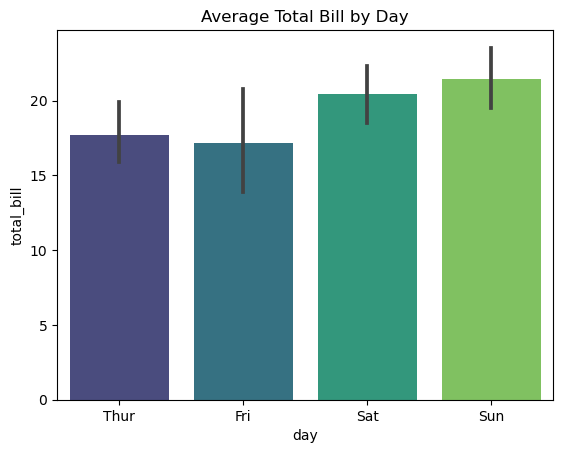

In [78]:
#Bar plot: Average total bill by day
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")
plt.title("Average Total Bill by Day")
plt.show()

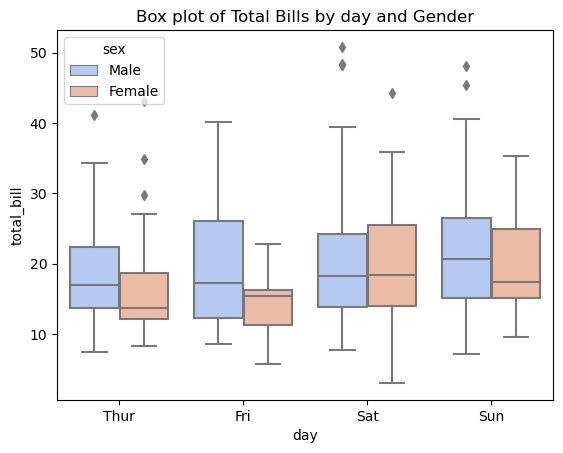

In [80]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("Box plot of Total Bills by day and Gender")
plt.show()

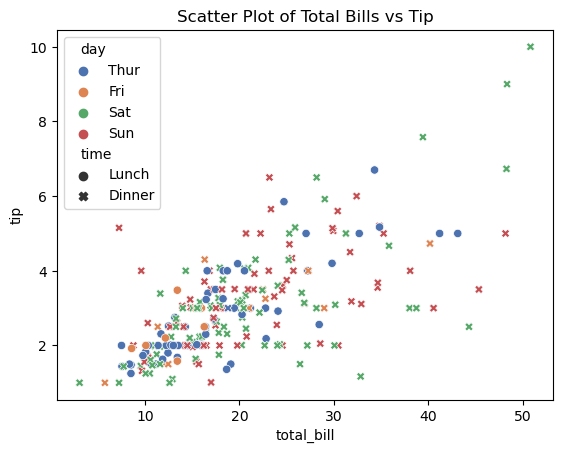

In [81]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")
plt.title("Scatter Plot of Total Bills vs Tip")
plt.show()

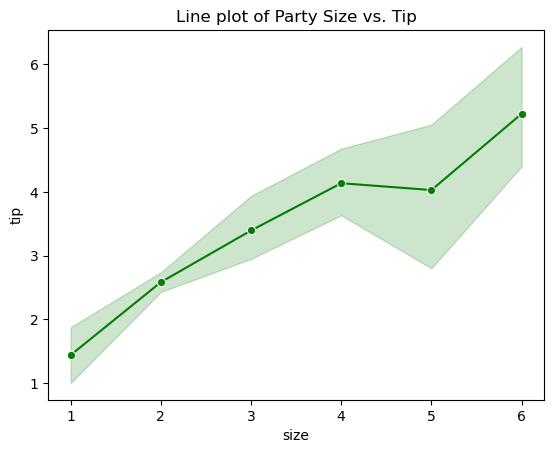

In [82]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="green")
plt.title("Line plot of Party Size vs. Tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


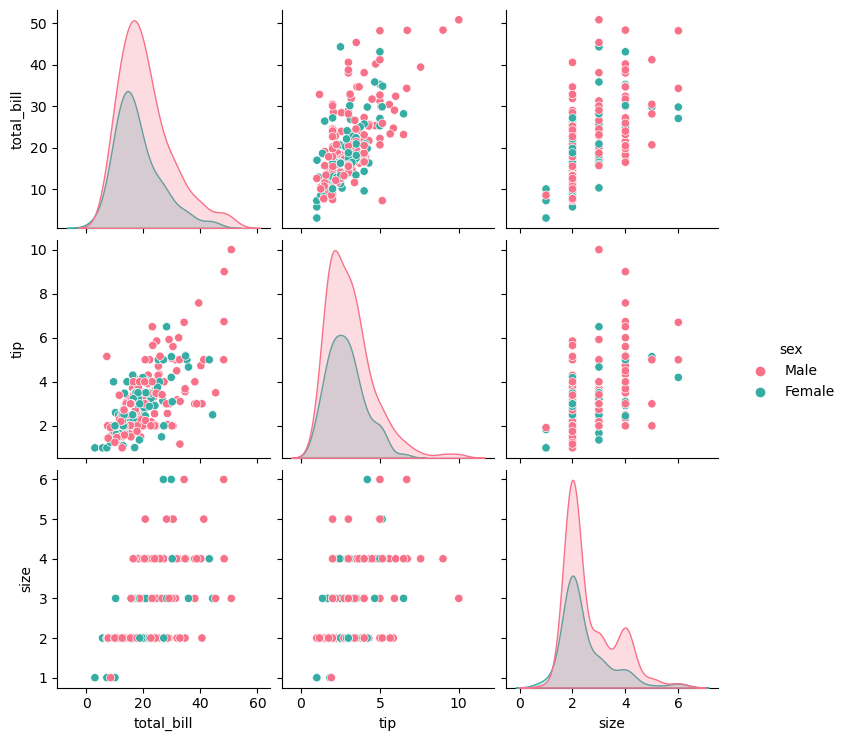

In [83]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

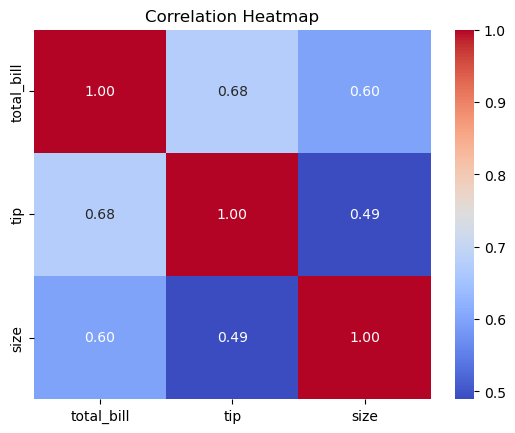

In [87]:
#Heatmaps display the data as color-coded matrix
#Corelation heatmap
numeric_tips=tips.select_dtypes(include=["number"])
correlation_matrix=numeric_tips.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [89]:
hd=pd.read_csv("train.csv")
hd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
data=pd.read_csv("test.csv")
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


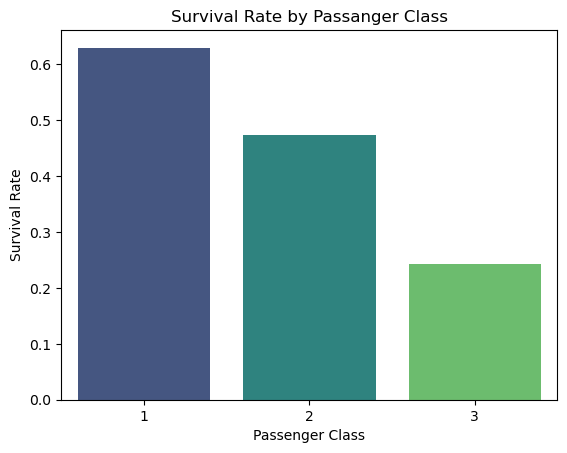

In [98]:
sns.barplot(data=hd,x='Pclass',y='Survived',errorbar=None,palette="viridis")
plt.title("Survival Rate by Passanger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

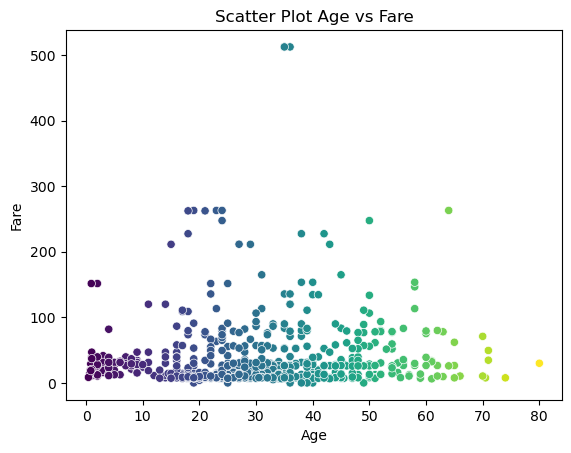

In [110]:
sns.scatterplot(data=hd,x="Age",y="Fare", hue="Age", palette="viridis", legend=None)
plt.title("Scatter Plot Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


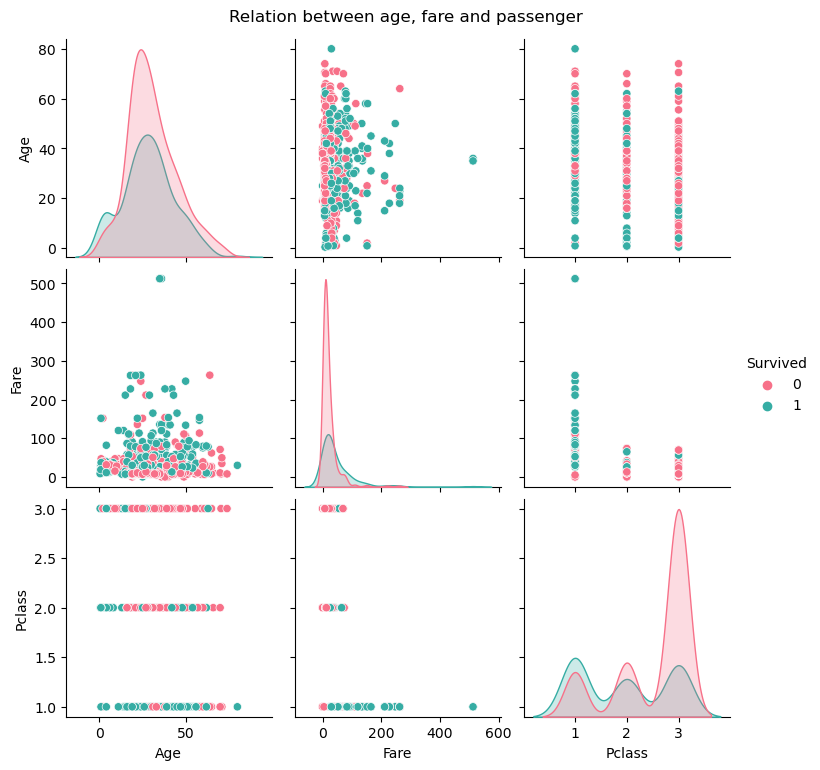

In [117]:
#sns.pairplot(data=hd, vars=["Age", "Fare", "Pclass"], hue="Pclass", palette="husl")
subset=hd[["Age", "Fare", "Pclass","Survived"]]
sns.pairplot(subset,hue="Survived", palette="husl",diag_kind='kde')
plt.suptitle("Relation between age, fare and passenger", y=1.02)
plt.show()

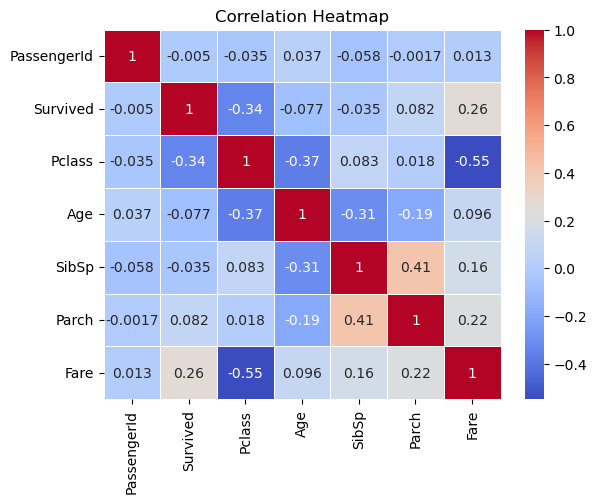

In [120]:
numeric_train=hd.select_dtypes(include="number")
correlation_matrix=numeric_train.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()